# **4. Aprendizado de Máquina**

O objetivo desse notebook é **exclusivamente** avaliar diferentes modelos de Aprendizado de Máquina e seus desempenhos em relação à base de dados da PNS 2019 minerada e pré-processada.

In [324]:
#Importação das bibliotecas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

In [325]:
# Definir o diretório onde os arquivos estão salvos
#diretorio = "../dados"

# Carregar X_TRAIN
with open('X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

# Carregar Y_TRAIN
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

# Carregar X_TEST
with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

# Carregar Y_TEST
with open('Y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

print("Arquivos importados com sucesso!")

Arquivos importados com sucesso!


## **4.1. Árvore De Decisão**

In [326]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(criterion='gini')
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [328]:
previsoes = modelo.predict(X_test)

In [329]:
previsoes

array([0, 2, 1, ..., 2, 2, 2], dtype=int32)

In [330]:
y_test

,Condicao
14478,2
17761,2
119711,1
27930,2
35216,2
...,...
27419,2
55962,2
22915,2
133436,0


In [331]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.5560189046427578

Acurácia de 55.6% utilizando árvore de decisão. Lembrando que a acurácia é a soma dos acertos dividido pelo total de instâncias.

**Conclusão:** O modelo de árvore de decisão acerta 55% das instâncias.

In [332]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[ 319,  190,   77],
       [1374, 1682,  885],
       [ 781, 1484, 3999]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.5560189046427578

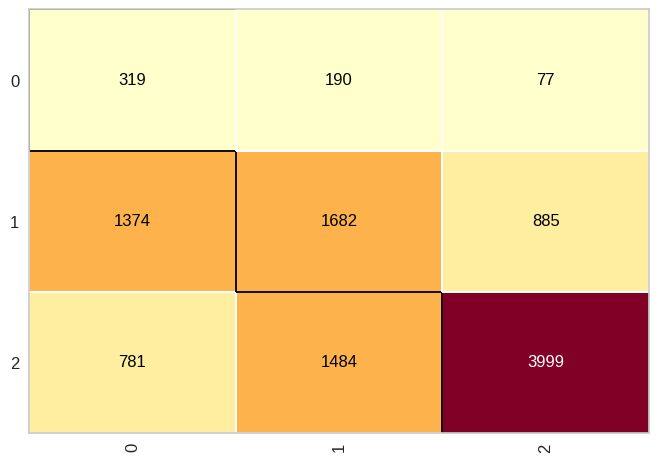

In [333]:
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [334]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.13      0.54      0.21       586
           1       0.50      0.43      0.46      3941
           2       0.81      0.64      0.71      6264

    accuracy                           0.56     10791
   macro avg       0.48      0.54      0.46     10791
weighted avg       0.66      0.56      0.59     10791



**Métricas de Avaliação: Árvore de Decisão**

- **Precision:** HiperCVD = 13%, HA = 50%, Saudáveis = 81%

- **Recall:** HiperCVD = 54%, HA = 43%, Saudáveis = 64%

- **F1-Score:** HiperCVD = 21%, HA = 46%, Saudáveis = 71%

## **4.2. Floresta Aleatória**

In [335]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=80, max_features=3, criterion='gini', random_state = 42)
modelo.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=80, random_state=42)

In [336]:
previsoes = modelo.predict(X_test)

In [337]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.6423871744972662

In [338]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[ 403,  143,   40],
       [1391, 1746,  804],
       [ 431, 1050, 4783]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.6423871744972662

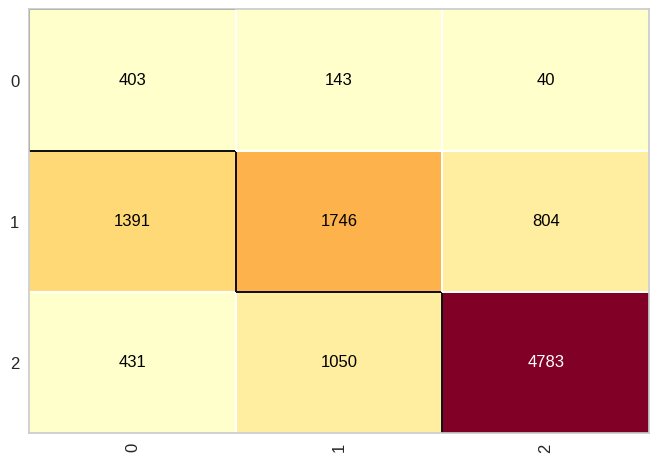

In [339]:
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [340]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.18      0.69      0.29       586
           1       0.59      0.44      0.51      3941
           2       0.85      0.76      0.80      6264

    accuracy                           0.64     10791
   macro avg       0.54      0.63      0.53     10791
weighted avg       0.72      0.64      0.67     10791



**Métricas de Avaliação: Floresta Aleatória**

- **Precision:** HiperCVD = 18%, HA = 59%, Saudáveis = 85%

- **Recall:** HiperCVD = 69%, HA = 44%, Saudáveis = 76%

- **F1-Score:** HiperCVD = 29%, HA = 51%, Saudáveis = 80%

## **4.3. XGBoost**

In [341]:
import xgboost as xgb

modelo = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')
modelo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [342]:
previsoes = modelo.predict(X_test)

In [343]:
accuracy_score(y_test,previsoes)

0.6477620239088129

In [344]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[ 391,  156,   39],
       [1352, 1860,  729],
       [ 449, 1076, 4739]])

0.6477620239088129

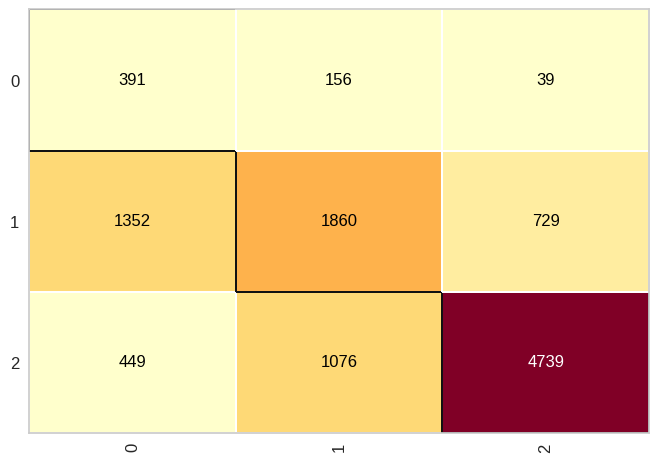

In [345]:
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [346]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.18      0.67      0.28       586
           1       0.60      0.47      0.53      3941
           2       0.86      0.76      0.81      6264

    accuracy                           0.65     10791
   macro avg       0.55      0.63      0.54     10791
weighted avg       0.73      0.65      0.68     10791



**Métricas de Avaliação: XGBoost**

- **Precision:** HiperCVD = 18%, HA = 60%, Saudáveis = 86%

- **Recall:** HiperCVD = 67%, HA = 47%, Saudáveis = 76%

- **F1-Score:** HiperCVD = 28%, HA = 53%, Saudáveis = 81%

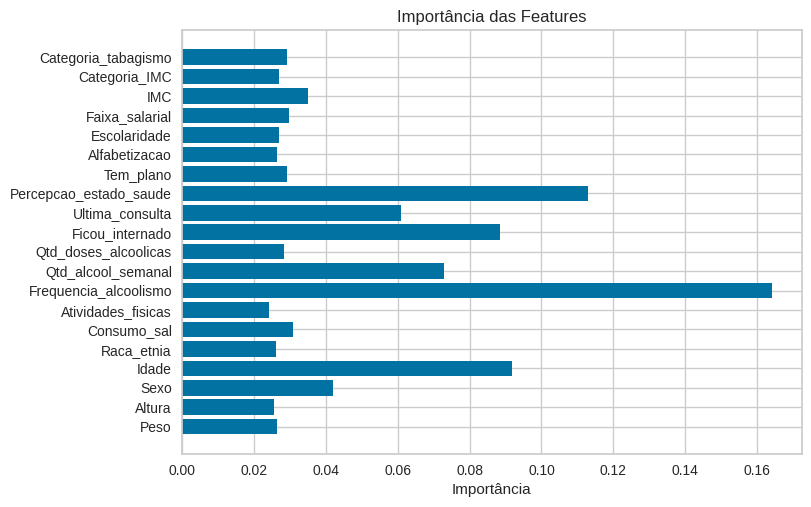

In [347]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Treinando o modelo
modelo = xgb.XGBClassifier()
modelo.fit(X_train, y_train)

# Importância das features
importancia = modelo.feature_importances_

# Plotar a importância
plt.barh(range(len(importancia)), importancia)
plt.yticks(range(len(importancia)), X_train.columns)
plt.xlabel('Importância')
plt.title('Importância das Features')
plt.show()